# MOVIE INDUSTRY ANALYSIS (1980-2020)

In [43]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
from scipy import stats
from scipy.stats import linregress
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [44]:
#import data

df=pd.read_csv(r"C:\Users\ajoal\OneDrive\Desktop\movie.csv")

In [45]:
df.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [46]:
#Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   votes     7665 non-null   float64
 5   director  7668 non-null   object 
 6   writer    7665 non-null   object 
 7   star      7667 non-null   object 
 8   country   7665 non-null   object 
 9   budget    5497 non-null   float64
 10  gross     7479 non-null   float64
 11  company   7651 non-null   object 
 12  runtime   7664 non-null   float64
dtypes: float64(4), object(9)
memory usage: 778.9+ KB


In [47]:
#Number of rows and columns

print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 7668
Total columns: 13


## Data Cleaning

In [48]:
#Check for duplicates

df[df.duplicated()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime


In [49]:
#check for missing values

df.isnull().sum()

name           0
rating        77
genre          0
released       2
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [50]:
#Drop the rows that have missing values in budget and gross

df = df.dropna(subset=['budget'])
df = df.dropna(subset=['gross'])

# Fill missing values in ratings and company columns with "Unknown"

df['rating'] = df['rating'].fillna("Unknown")
df['company'] = df['company'].fillna("Unknown")

# Fill runtime with median runtime

df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [51]:
df[df['country'].isnull()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Unknown,Horror,2019-06-14,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [52]:
#Fill country of clinton road movie as united states

df['country'] = df['country'].fillna("United States")

In [53]:
#All missing values has been populated

df.isnull().sum()

name        0
rating      0
genre       0
released    0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [54]:
#Data Types of each column

df.dtypes

name         object
rating       object
genre        object
released     object
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [55]:
#Change the data type of budget and gross

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [56]:
#Verify the change

df.dtypes

name         object
rating       object
genre        object
released     object
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [57]:
#Convert release_date to datetime

df['released'] = pd.to_datetime(df['released'])

In [58]:
#Extract year and month from released

df['release_year'] = df['released'].dt.year
df['release_month'] = df['released'].dt.month_name()

In [59]:
#Drop the row where year is 1905 because it is not informative to the dataset 

df = df.drop(df[df['release_year'] == 1905].index)

In [60]:
#Add new columns profit and roi

df['profit'] = df['gross'] - df['budget']
df['roi'] = df['profit'] / df['budget']

In [61]:
#New number of rows and columns

print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 5431
Total columns: 17


In [62]:
#Cleaned dataset

df.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_month,profit,roi
0,The Shining,R,Drama,1980-06-13,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June,27998772,1.473620
1,The Blue Lagoon,R,Adventure,1980-07-02,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July,54353106,12.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June,520375067,28.909726
3,Airplane!,PG,Comedy,1980-07-02,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July,79953539,22.843868
4,Caddyshack,R,Comedy,1980-07-25,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July,33846344,5.641057


## Exploratory Data Analysis

### Top ten companies with high gross

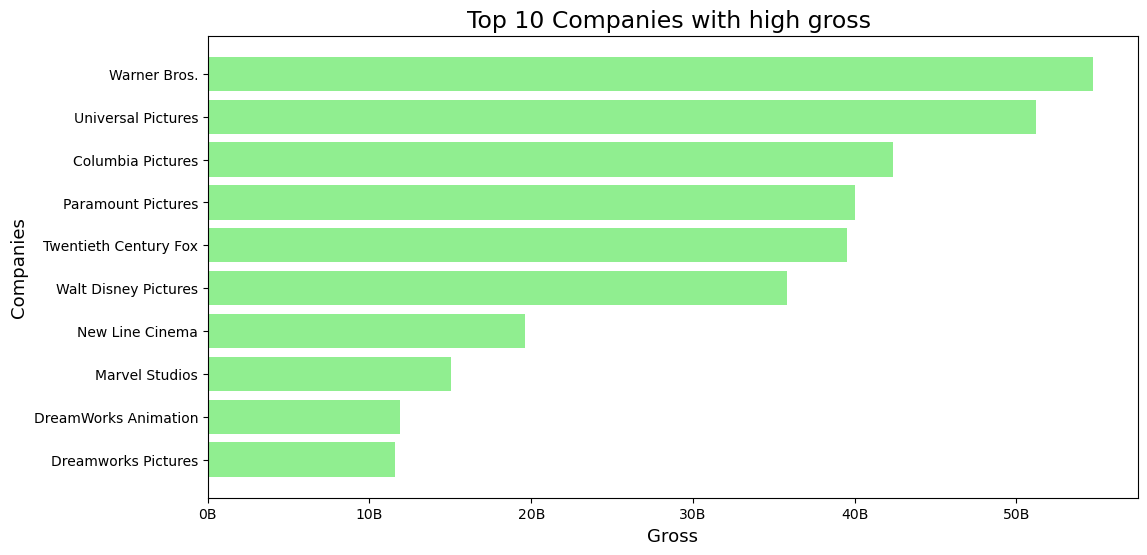

In [63]:
#Top ten companies with high gross
top_ten_companies = (
    df.groupby('company')[['gross']]
       .sum()
       .sort_values('gross', ascending=False)
       .head(10)
)

#Barplot
plt.figure(figsize=(12,6))
plt.barh(
    top_ten_companies.index, 
    top_ten_companies['gross'], 
    color='lightgreen'
)

# Add titles and labels
plt.xlabel('Gross', fontsize=13) 
plt.ylabel('Companies',fontsize=13) 
plt.title('Top 10 Companies with high gross ',fontsize=17)

# Format x-axis in millions
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.0f}B')
)

plt.gca().invert_yaxis()
plt.show()

### Average profit that movie industry had each year since 1980

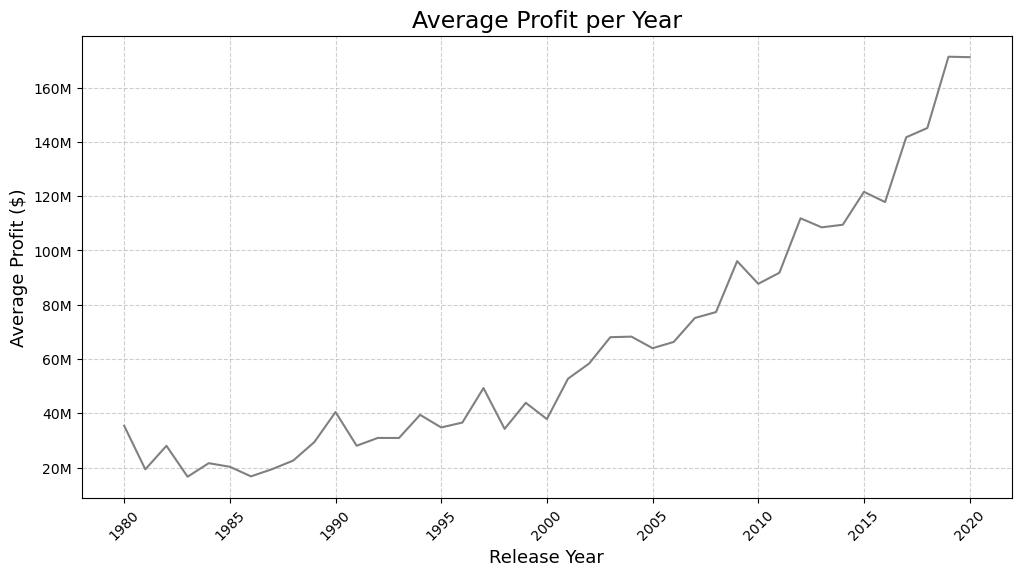

In [178]:
#Average profit that movie industry had each year since 1980

#Group by year
avg_profit_per_year = (
    df.groupby('release_year')[['profit']]
       .mean()
)    

#Plot
plt.figure(figsize=(12,6))
plt.plot(
    avg_profit_per_year.index, 
    avg_profit_per_year['profit'], 
    color='grey'
)

# Add titles and labels   
plt.xlabel("Release Year",fontsize=13)
plt.ylabel("Average Profit ($)",fontsize=13)
plt.title("Average Profit per Year",fontsize=17)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.show()

### Average profit of movie industry by month

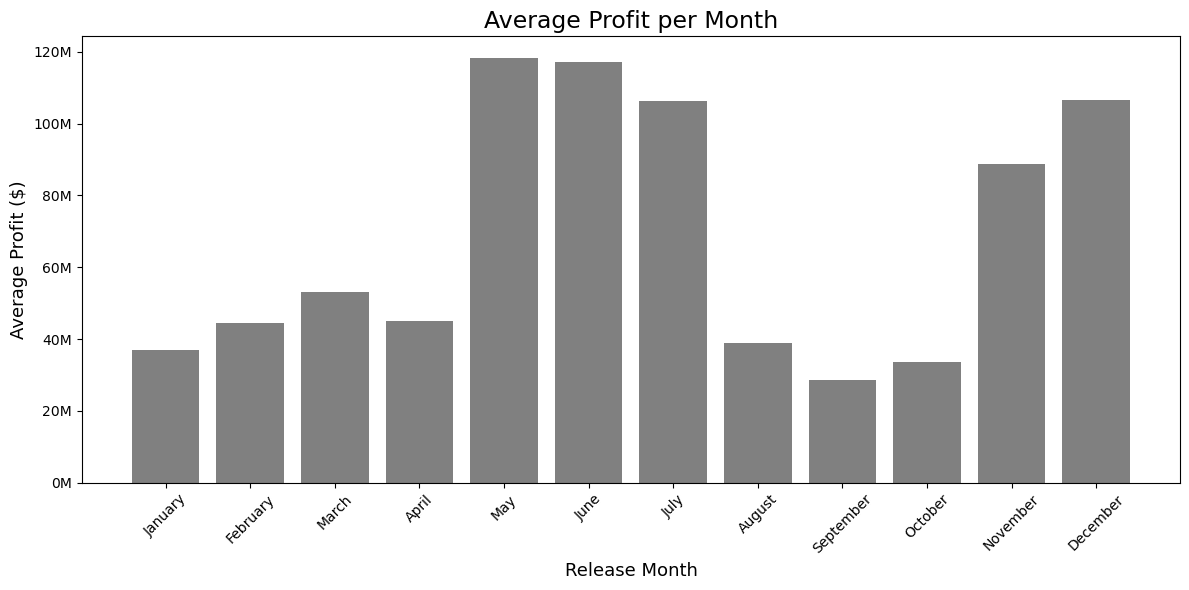

In [179]:
#Plot average profit of movie industry by month

# Group by month
avg_profit_per_month = (
    df.groupby('release_month')[['profit']]
       .mean()
       .reset_index()
)

# Use categorical type to enforce calendar order
months_ordered = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

avg_profit_per_month['release_month'] = pd.Categorical(
    avg_profit_per_month['release_month'], 
    categories=months_ordered, 
    ordered=True
)

# Sort by the defined order
avg_profit_per_month = avg_profit_per_month.sort_values('release_month')

#Barplot
plt.figure(figsize=(12,6))
plt.bar(
    avg_profit_per_month['release_month'], 
    avg_profit_per_month['profit'], 
    color='grey'
)

# Add titles and labels
plt.xlabel("Release Month", fontsize=13)
plt.ylabel("Average Profit ($)", fontsize=13)
plt.title("Average Profit per Month", fontsize=17)
plt.xticks(rotation=45)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.show()

### Average profit of each genre 

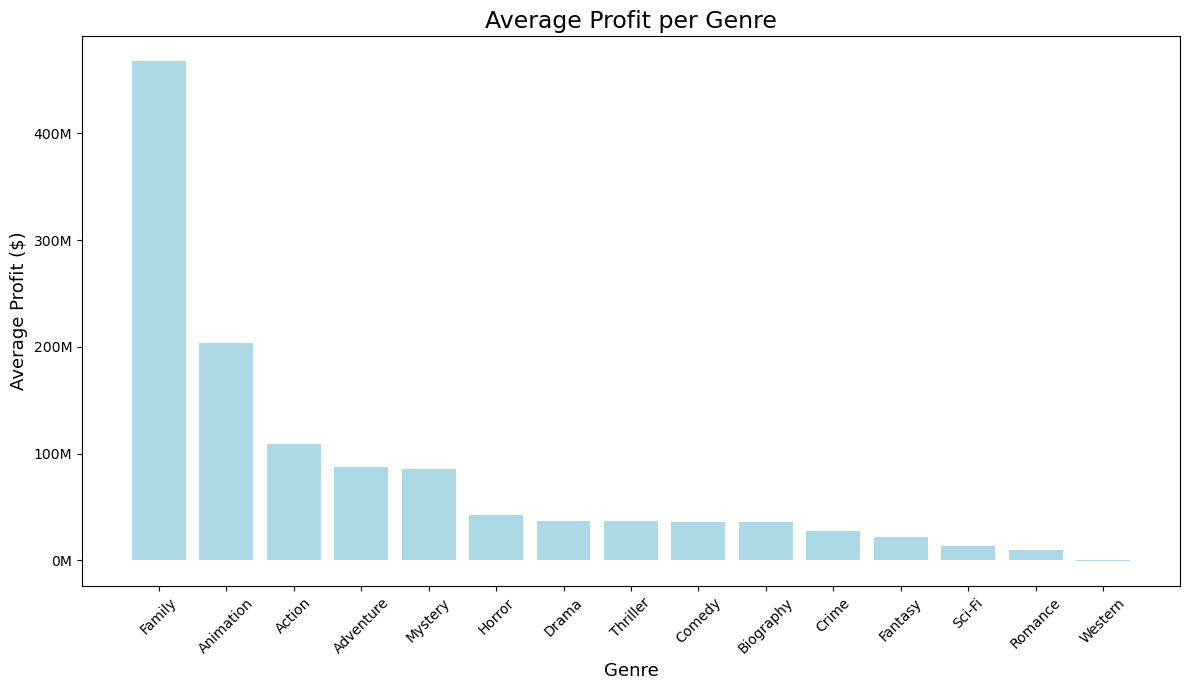

In [180]:
#Average profit of each genre 
avg_profit_per_genre = ( 
              df.groupby('genre')[['profit']]
                 .mean()
                 .sort_values(by='profit', ascending=False)
)   

#Barplot 
plt.figure(figsize=(12,7)) 
plt.bar(
    avg_profit_per_genre.index, 
    avg_profit_per_genre['profit'], 
    color='lightblue'
) 

# Add titles and labels
plt.xlabel('Genre', fontsize=13) 
plt.ylabel('Average Profit ($)',fontsize=13) 
plt.title('Average Profit per Genre',fontsize=17) 
plt.xticks(rotation=45) 

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.show()

### Runtime of each Genre

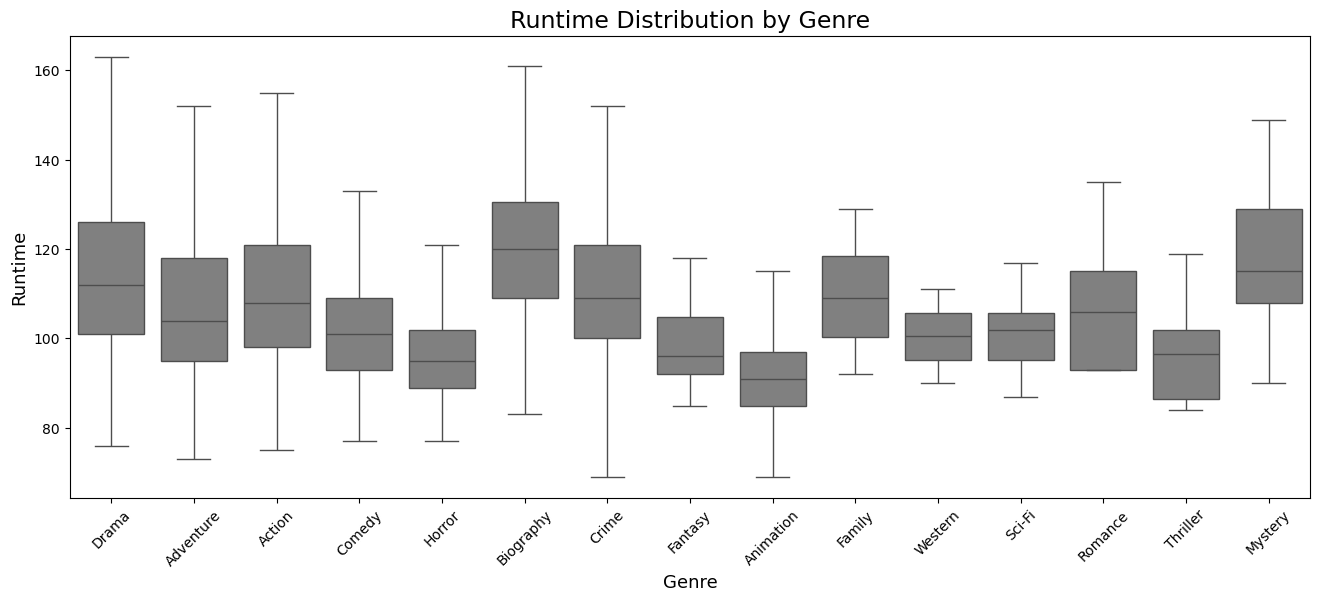

In [181]:
#Runtime of each Genre

#Boxplot
plt.figure(figsize=(16,6))
sns.boxplot(
    x='genre', 
    y='runtime', 
    data=df, 
    showfliers=False, 
    color= 'grey'
)

# Add titles and labels
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Runtime',fontsize=13)
plt.xticks(rotation=45)
plt.title("Runtime Distribution by Genre", fontsize=17)
plt.show()

### Does runtime affect Gross?

Correlation coefficient (r): 0.28
Probability value (p): 3.520862576923664e-95


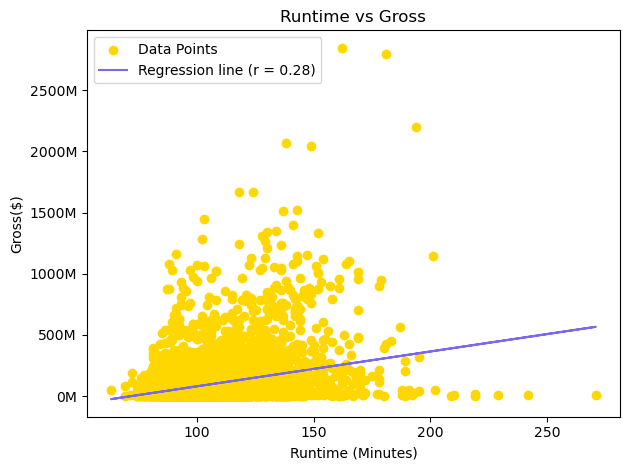

In [182]:
#Assign Values for duration and worldwide gross
duration = df['runtime']
worldwide_gross = df['gross']

#Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(duration, worldwide_gross)

# Calculate regression line values
regression_line = slope * duration + intercept

# Calculate the regression line values
print(f'Correlation coefficient (r): {r_value:.2f}')

#Print p-value
print(f'Probability value (p): {p_value}')

#Create Scatterplot
plt.scatter(
    duration, 
    worldwide_gross, 
    color='gold', 
    label ='Data Points'
)

plt.plot(
    duration, 
    regression_line, 
    color ='mediumslateblue', 
    label=f'Regression line (r = {r_value:.2f})'
)

# Add titles and labels
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Gross($)')
plt.title ('Runtime vs Gross')

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.legend()
plt.show()

### Budget vs Gross

Probability value (p): 0.0


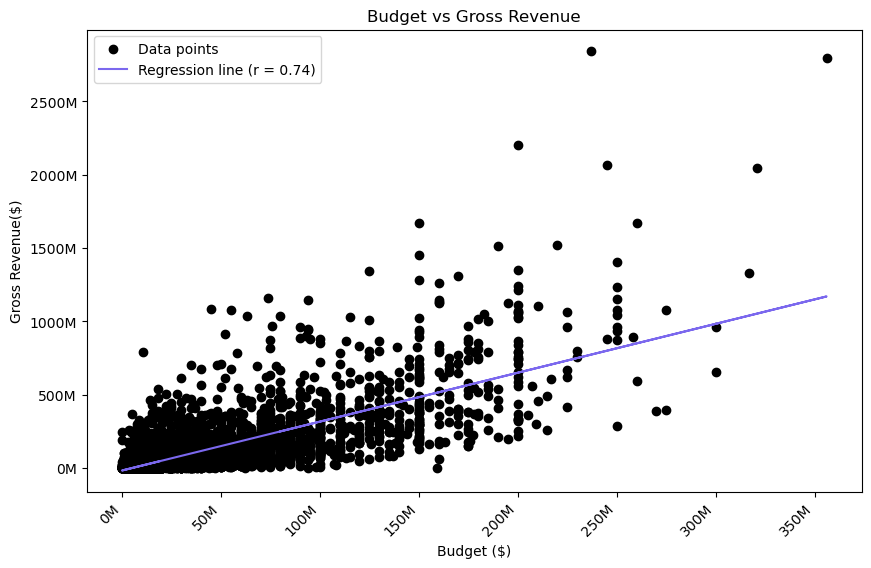

In [183]:
#Budget vs Gross

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(df['budget'], df['gross'])

# Calculate the regression line values
regression_line1 = slope * df['budget'] + intercept

#Print p-value
print(f'Probability value (p): {p_value}')

# Plot the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(
    df['budget'], 
    df['gross'], 
    color='black', 
    label='Data points'
)

plt.plot(
    df['budget'], 
    regression_line1, 
    color='mediumslateblue', 
    label=f'Regression line (r = {r_value:.2f})'
)

# Add titles and labels
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue($)') 
plt.xticks(rotation=45, ha='right')

# Format y-axis and x-axis in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M'))

plt.legend()
plt.show()

## Hypothesis Test (Do High-Budget Movies Have Higher ROI?)

In [184]:
#Null Hypothesis (H₀): High-budget movies do not have higher ROI than low-budget movies.

#Alternative Hypothesis (H₁): High-budget movies have higher ROI than low-budget movies.

#Significant value = 0.05

# Split data into high-budget and low-budget groups
median_budget = df['budget'].median()
high_budget = df[df['budget'] >= median_budget]['roi']
low_budget = df[df['budget'] < median_budget]['roi']

# Run two-sided test first
t_stat, p_val_two_sided = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print("T-statistic:", t_stat)
print("Two-sided P-value:", p_val_two_sided)

# Convert to one-sided p-value
if t_stat > 0:
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)
print("One-sided P-value:", p_val_one_sided)

#Result
if p_val_one_sided < 0.05:
    print("Reject H₀ → High-budget movies earn significantly more ROI than low-budget movies.")
else:
    print("Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.")


T-statistic: -1.6478561523049002
Two-sided P-value: 0.09949913133452995
One-sided P-value: 0.950250434332735
Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.


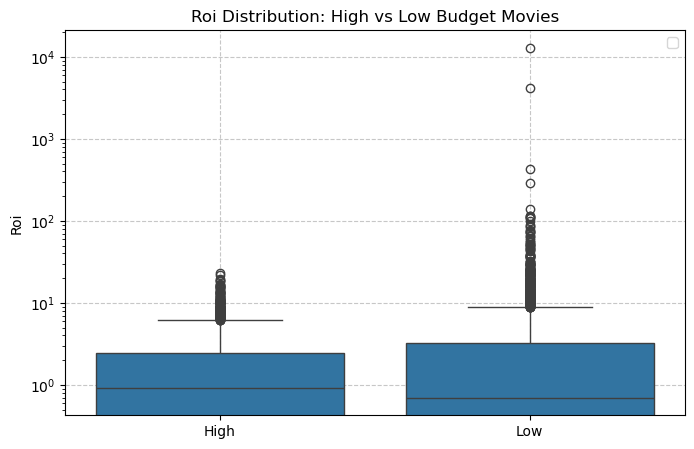

In [185]:
#Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=['High']*len(high_budget) + ['Low']*len(low_budget), 
            y=pd.concat([high_budget, low_budget]))
plt.title("Roi Distribution: High vs Low Budget Movies")
plt.ylabel("Roi")
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale("log")
plt.legend()
plt.show()

#### Interpretation: 
##### We fail to reject H₀. There is no statistical evidence that high-budget movies earn higher ROI than low-budget movies. In fact, the negative t-statistic indicates that the mean ROI for high-budget films is slightly lower, though not significantly so.
#### Conclusion:
##### High-budget movies may bring larger absolute profits, but ROI efficiency is not higher than low-budget films.

## Predictive Analysis: Predict Movie Gross Revenue 

In [66]:
# Select features
features = ["budget", "runtime", "votes", "genre", "rating", "release_month"]
X = df[features]
y = df["gross"]

# Train/test split
from sklearn.model_selection import train_test_split
y_binned = pd.qcut(y, q=10)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=617,
                                                    stratify=y_binned)

# Transform data
categorical_features = ['rating','genre','release_month']

X_train = pd.get_dummies(X_train_raw, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test = pd.get_dummies(X_test_raw, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train.head()


,budget,runtime,votes,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unknown,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
7260,29000000,111.0,33000,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6323,3000000,109.0,146000,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2810,17000000,111.0,5600,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4918,100000000,108.0,174000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6697,11800000,118.0,120000,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


### Computing MI scores

Top 10 features ranked by Mutual Information with Gross Revenue:
votes                 0.435871
budget                0.382844
runtime               0.057899
rating_R              0.043433
rating_PG-13          0.035652
genre_Animation       0.022349
genre_Drama           0.011607
rating_Not Rated      0.010536
genre_Comedy          0.010509
release_month_June    0.010022
dtype: float64


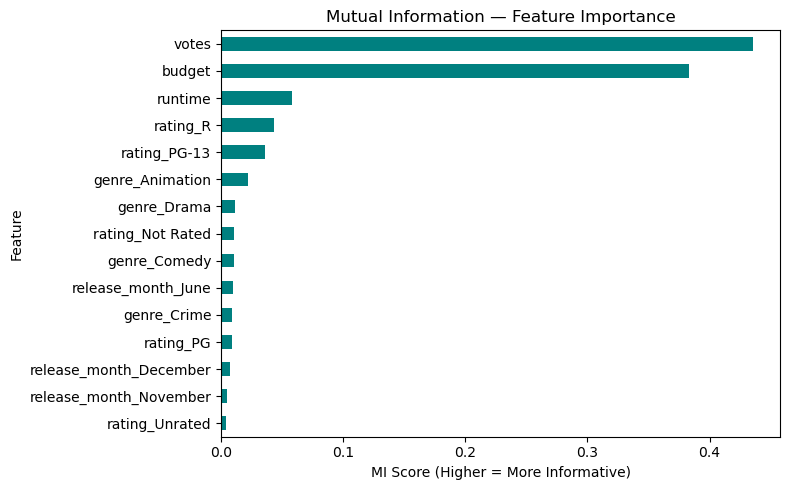

In [67]:
from sklearn.feature_selection import mutual_info_regression

# Use the same training data used for model fitting
X = X_train.copy()
y = y_train.copy()

# Compute MI scores
mi_scores = mutual_info_regression(X, y, random_state=617)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display top features
print("Top 10 features ranked by Mutual Information with Gross Revenue:")
print(mi_scores.head(10))

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
mi_scores.head(15).sort_values().plot(kind="barh", color="teal")
plt.title("Mutual Information — Feature Importance")
plt.xlabel("MI Score (Higher = More Informative)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train multiple models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=617),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=617),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=617)
}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Display results
results_df = pd.DataFrame(results).T.sort_values("R²", ascending=False)
results_df.index.name = "Model"
print(results_df)

                            MAE          RMSE        R²
Model                                                  
Gradient Boosting  4.462526e+07  8.411869e+07  0.759161
Random Forest      4.714428e+07  8.970949e+07  0.726084
Linear Regression  5.686658e+07  9.732849e+07  0.677581
XGBoost            5.094560e+07  9.870944e+07  0.668366


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 200}
Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

Tuned Model Results:
                                  MAE          RMSE  R² Score
Tuned Gradient Boosting  4.506477e+07  8.478235e+07  0.755346
Tuned XGBoost            4.474548e+07  8.210284e+07  0.770566


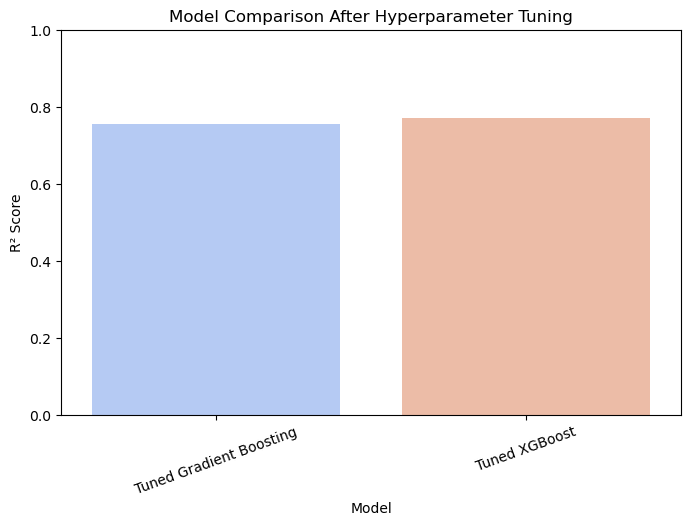

In [69]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid = {
    "n_estimators": [200, 300, 400, 500],
    "learning_rate":[0.05],
    "max_depth":    [3, 4],
    "min_samples_leaf":[2, 3, 4]
}

xgb_params = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4],
    'learning_rate': [0.05]
}

# Initialize models
gb_model = GradientBoostingRegressor(random_state=617)
xgb_model = XGBRegressor(random_state=617)

# Grid Search for Gradient Boosting
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

# Grid Search for XGBoost
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Print best parameters
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# Evaluate tuned models
models = {"Tuned Gradient Boosting": best_gb, "Tuned XGBoost": best_xgb}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R² Score": r2_score(y_test, y_pred)
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print("\nTuned Model Results:")
print(results_df)

# Visualize comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df.reset_index(), x="index", y="R² Score", palette="coolwarm")
plt.title("Model Comparison After Hyperparameter Tuning")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


Optimizing Random Forest...
Best params for Random Forest: {'n_estimators': 273, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 0.45482180128675176}

Optimizing Gradient Boosting...
Best params for Gradient Boosting: {'n_estimators': 275, 'learning_rate': 0.031242537976857963, 'max_depth': 4, 'min_samples_leaf': 8, 'subsample': 0.9316280283480847}

Optimizing XGBoost...
Best params for XGBoost: {'n_estimators': 597, 'learning_rate': 0.010859124024362968, 'max_depth': 5, 'subsample': 0.7697814823356645, 'colsample_bytree': 0.7922124083364512, 'min_child_weight': 1}


 Optuna-Tuned Model Performance:
                            MAE          RMSE        R²
XGBoost            4.356650e+07  8.120401e+07  0.775562
Gradient Boosting  4.450311e+07  8.373247e+07  0.761368
Random Forest      4.525688e+07  8.489364e+07  0.754703


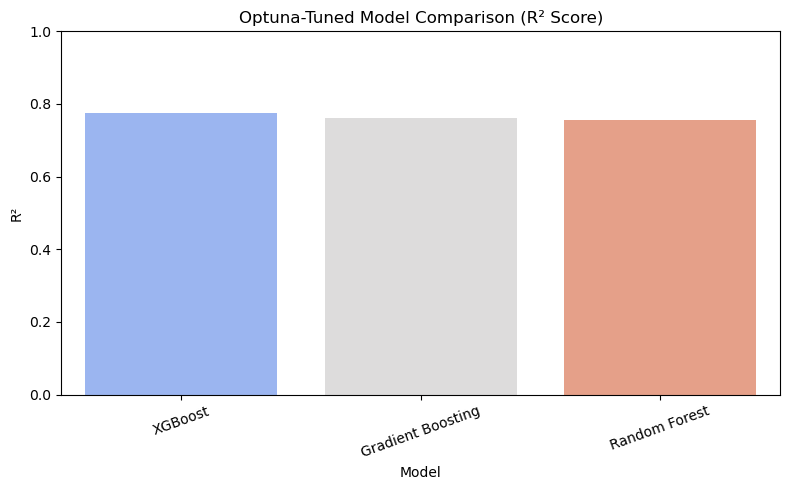

In [70]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Define cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=617)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# --- Define objective functions for each model ---

def objective_rf(trial):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        max_depth=trial.suggest_int("max_depth", 3, 15),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 10),
        max_features=trial.suggest_float("max_features", 0.4, 1.0),
        random_state=617,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=cv, n_jobs=-1)
    return -scores.mean()

def objective_gb(trial):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
        max_depth=trial.suggest_int("max_depth", 2, 8),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 10),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        random_state=617
    )
    scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=cv, n_jobs=-1)
    return -scores.mean()

def objective_xgb(trial):
    from xgboost import XGBRegressor
    model = XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 200, 600),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        random_state=617,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=cv, n_jobs=-1)
    return -scores.mean()

# --- Run Optuna optimization for each model ---
study_dict = {}

for name, func in {
    "Random Forest": objective_rf,
    "Gradient Boosting": objective_gb,
    "XGBoost": objective_xgb
}.items():
    print(f"Optimizing {name}...")
    study = optuna.create_study(direction="minimize")
    study.optimize(func, n_trials=200, n_jobs=-1)
    study_dict[name] = study
    print(f"Best params for {name}: {study.best_params}\n")

# --- Evaluate tuned models on test data ---
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

best_models = {
    "Random Forest": RandomForestRegressor(**study_dict["Random Forest"].best_params, random_state=617),
    "Gradient Boosting": GradientBoostingRegressor(**study_dict["Gradient Boosting"].best_params, random_state=617),
    "XGBoost": XGBRegressor(**study_dict["XGBoost"].best_params, random_state=617)
}

results_optuna = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results_optuna[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# --- Display Optuna results ---
results_optuna_df = pd.DataFrame(results_optuna).T.sort_values("R²", ascending=False)
print("\n Optuna-Tuned Model Performance:")
print(results_optuna_df)

# --- Visual comparison ---
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(data=results_optuna_df.reset_index(), x="index", y="R²", palette="coolwarm")
plt.title("Optuna-Tuned Model Comparison (R² Score)")
plt.xlabel("Model")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [81]:
# Best XGBoost Parameters from Optuna
best_params = {'n_estimators': 597, 
               'learning_rate': 0.010859124024362968, 
               'max_depth': 5, 
               'subsample': 0.7697814823356645, 
               'colsample_bytree': 0.7922124083364512, 
               'min_child_weight': 1
}

# Initialize model with best parameters
final_xgb = XGBRegressor(**best_params)

# Fit the model
final_xgb.fit(X_train, y_train)

# Predict on train and test data
y_pred_train = final_xgb.predict(X_train)
y_pred_test = final_xgb.predict(X_test)

# Evaluate
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Final XGBoost Model Performance")
print(f"Test MAE:   {mae_test:,.0f}")
print(f"Test RMSE:  {rmse_test:,.0f}")
print(f"Test R²:    {r2_test:.4f}")


Final XGBoost Model Performance
Test MAE:   43,505,092
Test RMSE:  81,270,794
Test R²:    0.7752


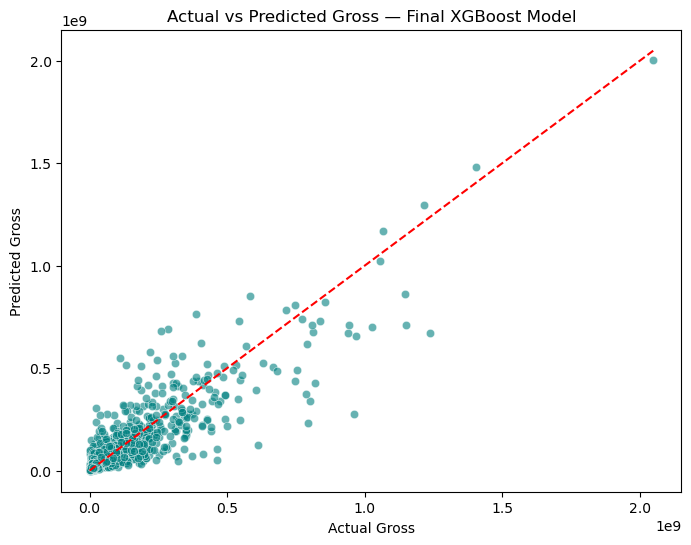

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross — Final XGBoost Model")
plt.show()


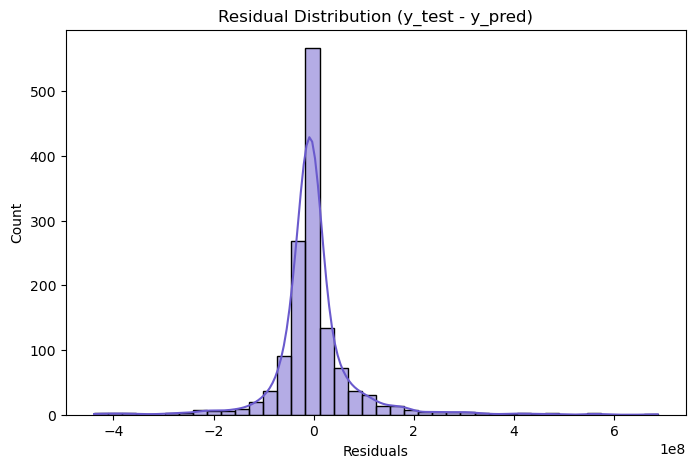

In [83]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40, kde=True, color='slateblue')
plt.title("Residual Distribution (y_test - y_pred)")
plt.xlabel("Residuals")
plt.show()


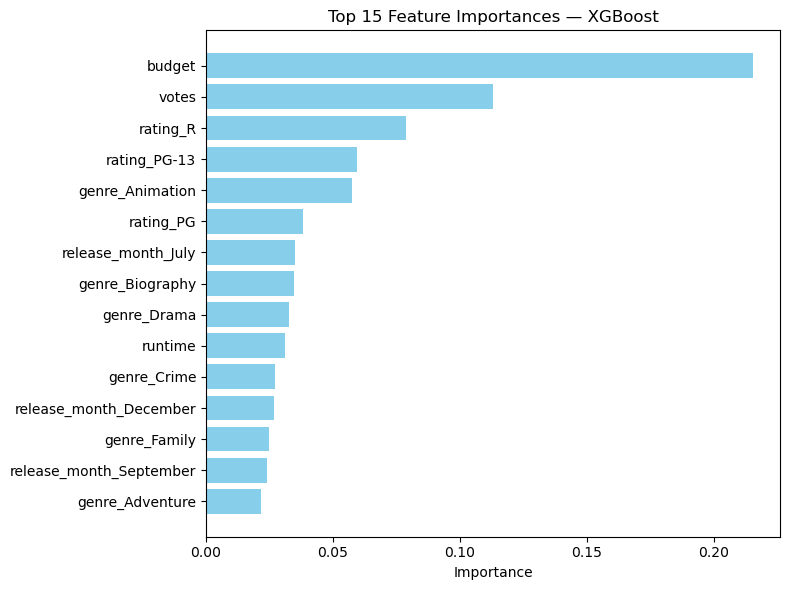

In [84]:
xgb_importance = final_xgb.feature_importances_
sorted_idx = np.argsort(xgb_importance)[-15:]

plt.figure(figsize=(8,6))
plt.barh(range(len(sorted_idx)), xgb_importance[sorted_idx], color='skyblue')
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title("Top 15 Feature Importances — XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [91]:
# --- Predict gross revenue for 5 random movies from test data ---
sample_movies = X_test.sample(5, random_state=617).copy()

# Predict using your final model
predicted_gross = final_xgb.predict(sample_movies)

# Get actual gross for comparison
actual_gross = y_test.loc[sample_movies.index]

# Create comparison table
prediction_df = pd.DataFrame({
    "Movie Name": df.loc[sample_movies_raw.index, "name"],
    "Genre": df.loc[sample_movies_raw.index, "genre"],
    "Rating": df.loc[sample_movies_raw.index, "rating"],
    "Release Month": df.loc[sample_movies_raw.index, "release_month"],
    "Budget ($)": df.loc[sample_movies_raw.index, "budget"],
    "Votes": df.loc[sample_movies_raw.index, "votes"],
    "Actual Gross ($)": actual_gross.round(0),
    "Predicted Gross ($)": predicted_gross.round(0)
})

# Format numbers nicely
pd.options.display.float_format = '{:,.0f}'.format

print("Sample Predictions (5 Movies):")
display(prediction_df)


Sample Predictions (5 Movies):


,Movie Name,Genre,Rating,Release Month,Budget ($),Votes,Actual Gross ($),Predicted Gross ($)
4692,Jarhead,Action,R,November,72000000,179000,97076152,"163,094,784"
5803,The Extra Man,Comedy,R,January,7000000,4800,649626,"6,462,722"
1894,Night on Earth,Comedy,R,December,3500000,57000,2023808,"25,377,100"
3356,Waking Ned Devine,Comedy,PG,January,3000000,26000,55257450,"27,002,974"
713,Young Sherlock Holmes,Adventure,PG-13,December,18000000,20000,19739575,"28,243,418"


## Model Validation Report:



### Model Overview

This report documents the validation of an XGBoost regression model developed to predict revenue of a Movie based on budget, runtime, votes, genre, rating, release_month

Best R² Score: 0.775562 (Tuned XGBoost)